# Introduction to L1 and L2 regularization

### by Sayeed Alvi and Samarth Mistry

### Presentation

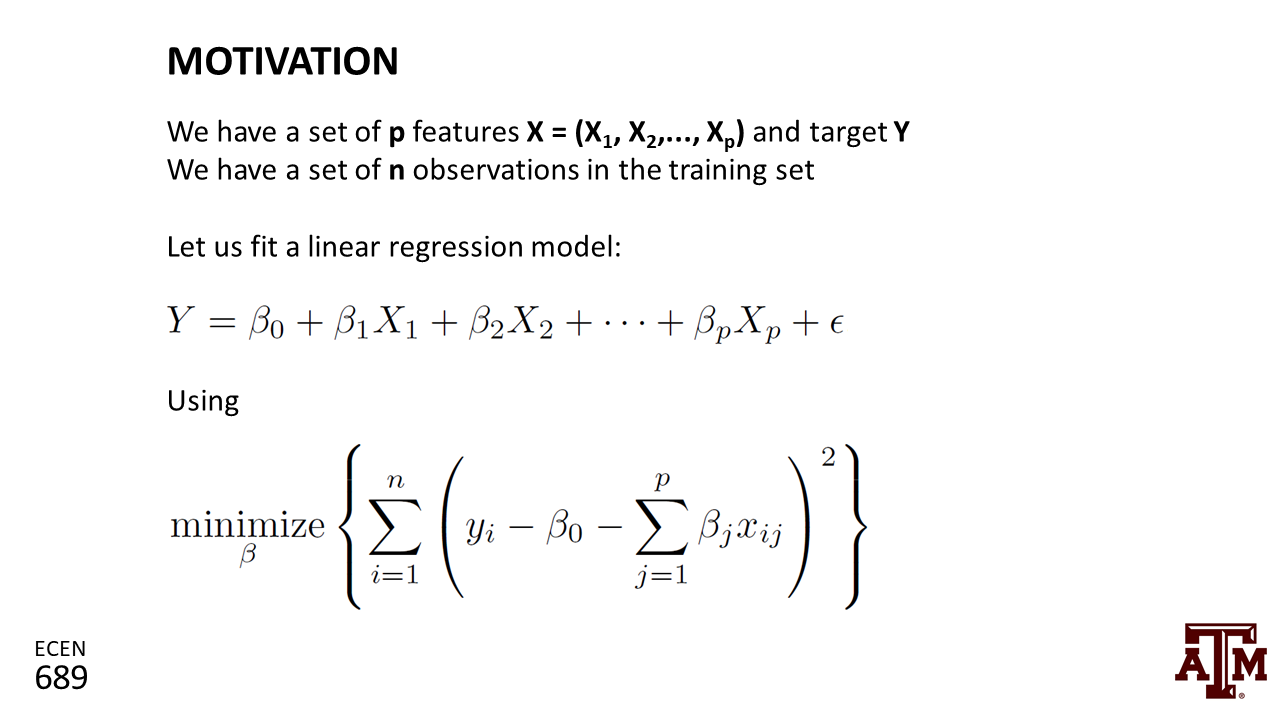

In [15]:
from IPython.display import Image
Image("L1_L2/Slide2.png")

Here, we want parameters (betas) such that they minimizing the sum of squared errors.

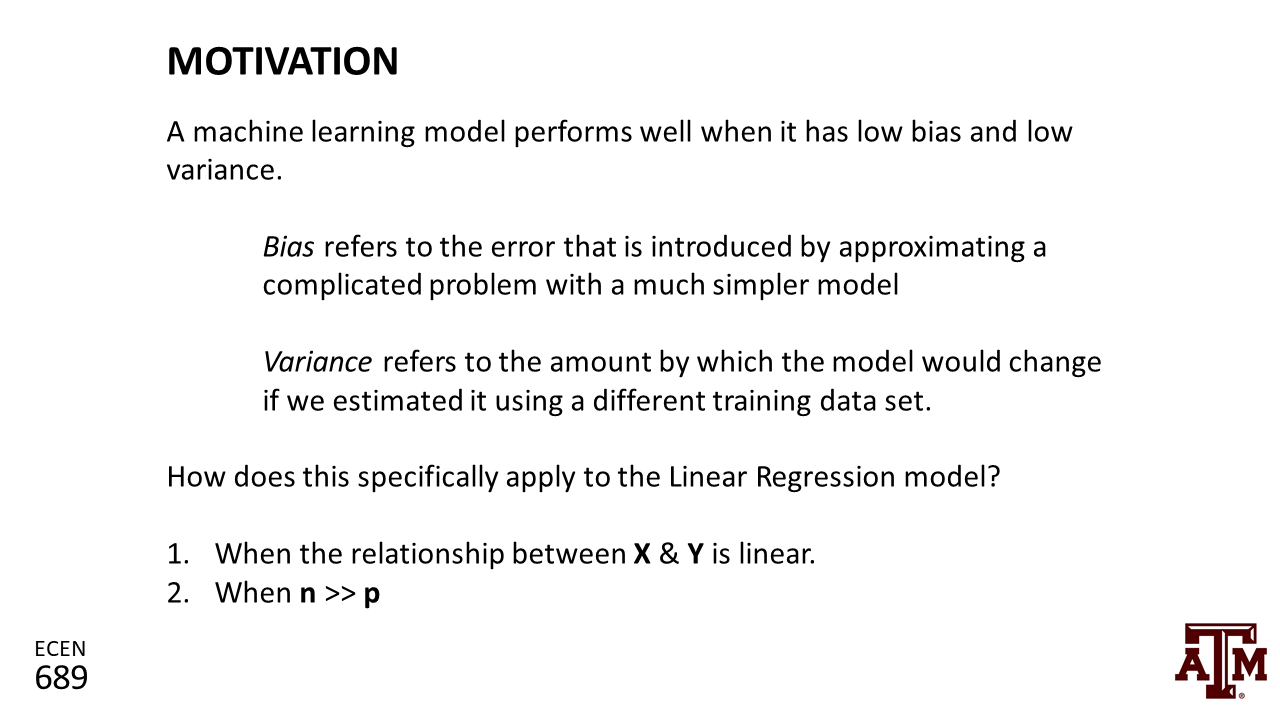

In [16]:
from IPython.display import Image
Image("L1_L2/Slide3.png")

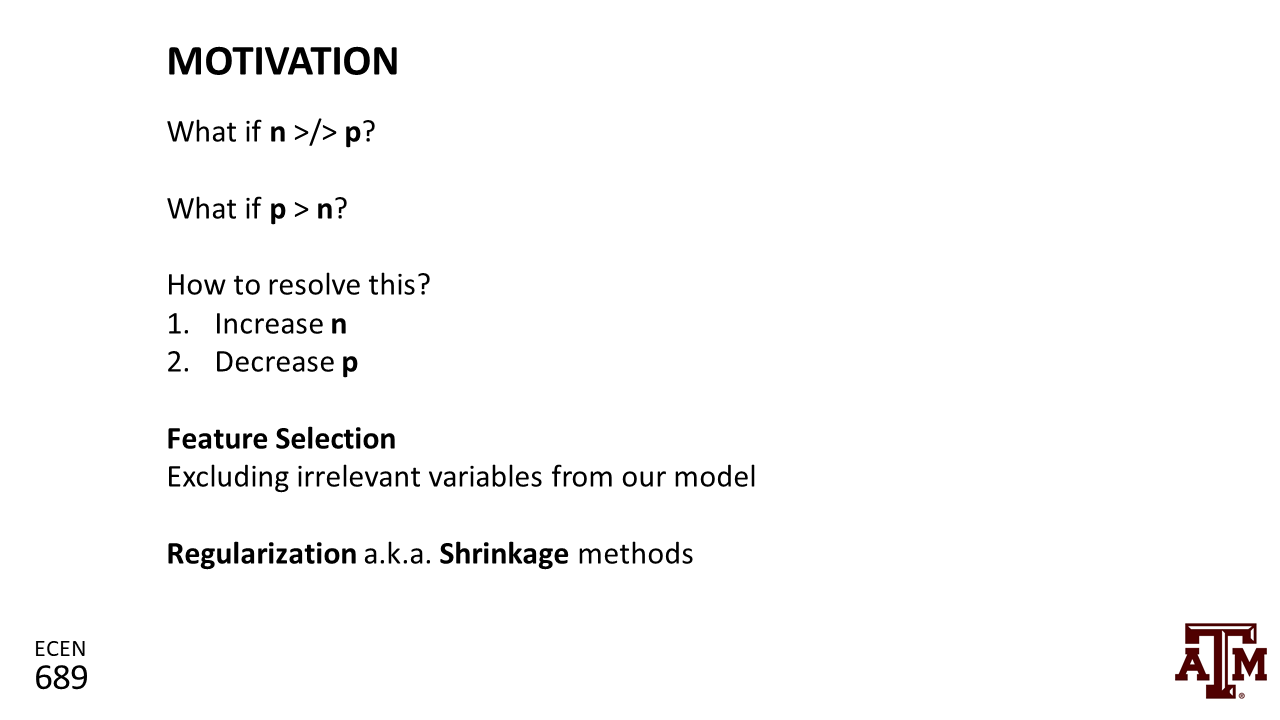

In [17]:
from IPython.display import Image
Image("L1_L2/Slide4.png")

Many times we don't have an opportunity to collect extra data. So the only option we have is to decrease 'p' somehow. One way to achieve this is be Regularization.

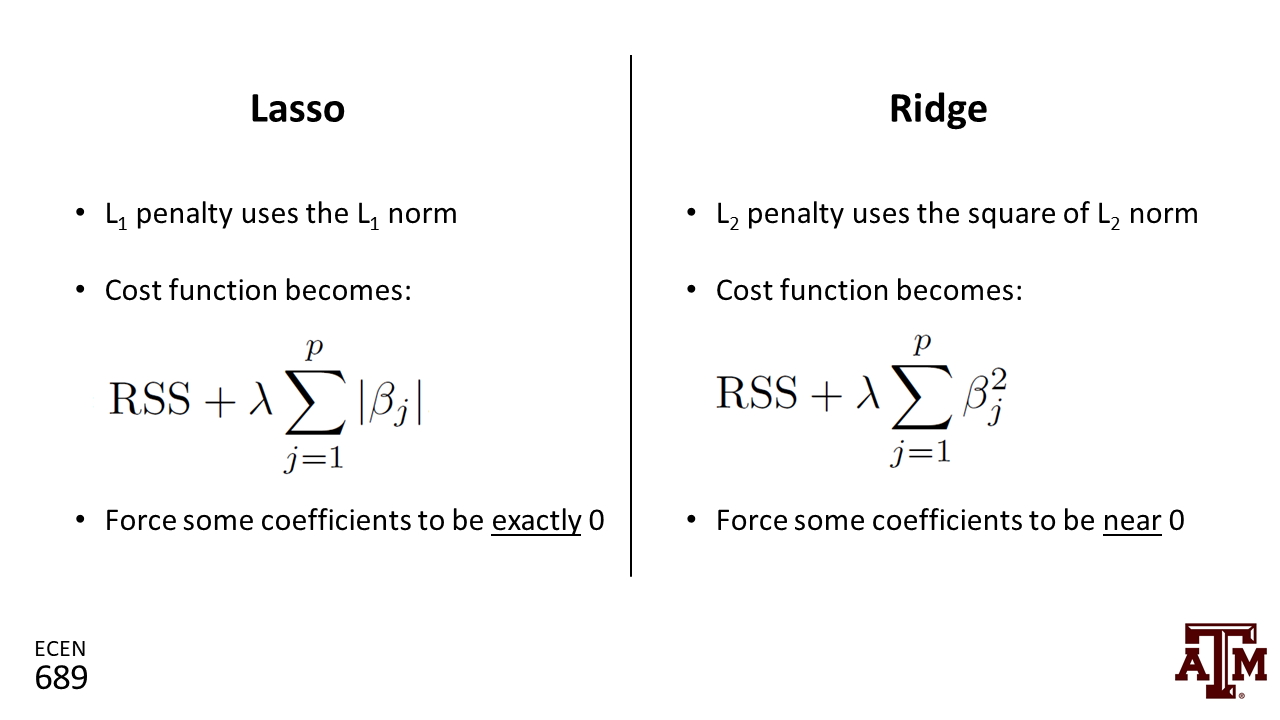

In [18]:
from IPython.display import Image
Image("L1_L2/Slide5.png")

Two most commonly used forms of regularization are Lasso and Ridge.

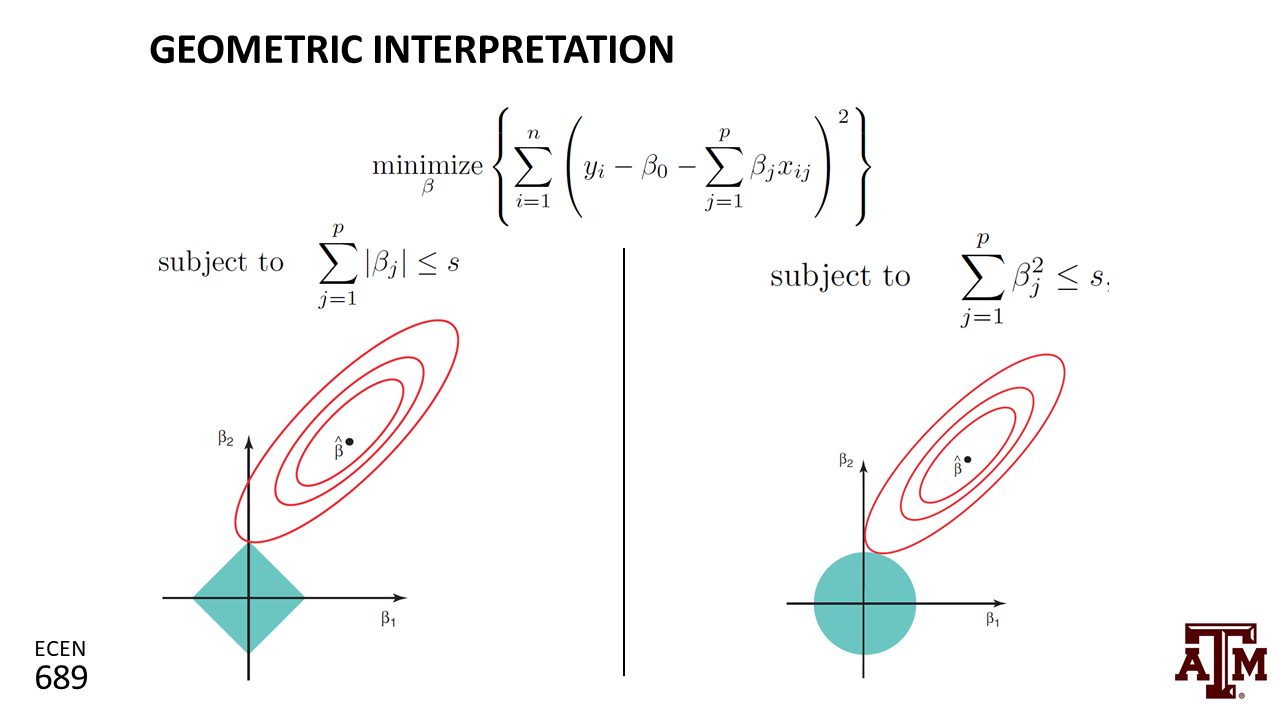

In [1]:
from IPython.display import Image
Image("L1_L2/Slide6.png")

The geometric interpretation helps us get an intuition why the Lasso creates sparsity (i.e. set some of the parameters/coeffficients to become exactly zero) and why Ridge cannot.

The lasso performs L1 shrinkage, so that there are "corners" in the constraint, which in two dimensions corresponds to a diamond. If the sum of squares "hits'' one of these corners, then the coefficient corresponding to the axis is shrunk to zero. As p increases, the multidimensional diamond has an increasing number of corners, and so it is highly likely that some coefficients will be set equal to zero. Hence, the lasso performs shrinkage and (effectively) subset selection.

In contrast with subset selection, ridge performs a soft thresholding: as the smoothing parameter is varied, the sample path of the estimates moves continuously to zero.

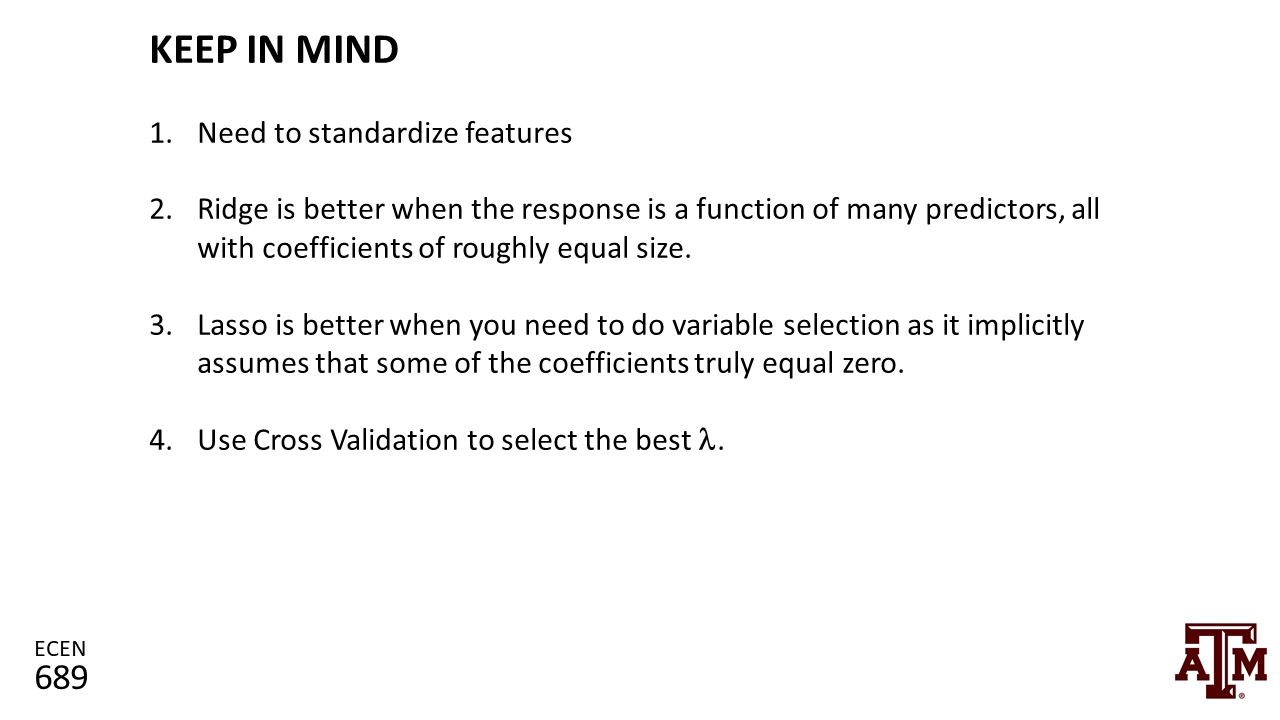

In [20]:
from IPython.display import Image
Image("L1_L2/Slide7.png")

The standard least squares parameter/coefficient estimates are scale equivariant: multiplying Xj by a constant c simply leads to a scale scaling of the least squares coefficient estimates by a factor of 1/c. But this is not the case with  parameter/coefficient estimates in regularization as βX will depend not only on the value of λ, but also on the scaling of the
jth feature (and sometimes other festures as well). Therefore, it is best to apply ridge regression after standardizing the predictors so they are all on the same scale.

# Python implementation using sklearn library

In [84]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [90]:
df = pd.read_csv('Hitters.csv')
print(df.isnull().sum())
print(df.sample(n=5))
df.dropna(axis=0, how='any', inplace = True)
df.head()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64
     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
300    510   147     10    56   52     53      7    2872    821      63   
122    539   139      5    93   58     69      5    1469    369      12   
33     583   168     17    83   80     56      5    1646    452      44   
301    578   138      1    56   59     34      3    1399    357       7   
129    570   169     21    72   88     38      7    3754   1077     140   

     CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary  \
300    307   340     174      N        E      810       99      18  1150.0   
122    247   126     198      A        W      462        9  

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [95]:
y = df.Salary

# Drop the column with the dependent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


<font color='green'>L2 Regularization</font>


In [97]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([  5.00000000e+09,   3.78231664e+09,   2.86118383e+09,
         2.16438064e+09,   1.63727458e+09,   1.23853818e+09,
         9.36908711e+08,   7.08737081e+08,   5.36133611e+08,
         4.05565415e+08,   3.06795364e+08,   2.32079442e+08,
         1.75559587e+08,   1.32804389e+08,   1.00461650e+08,
         7.59955541e+07,   5.74878498e+07,   4.34874501e+07,
         3.28966612e+07,   2.48851178e+07,   1.88246790e+07,
         1.42401793e+07,   1.07721735e+07,   8.14875417e+06,
         6.16423370e+06,   4.66301673e+06,   3.52740116e+06,
         2.66834962e+06,   2.01850863e+06,   1.52692775e+06,
         1.15506485e+06,   8.73764200e+05,   6.60970574e+05,
         5.00000000e+05,   3.78231664e+05,   2.86118383e+05,
         2.16438064e+05,   1.63727458e+05,   1.23853818e+05,
         9.36908711e+04,   7.08737081e+04,   5.36133611e+04,
         4.05565415e+04,   3.06795364e+04,   2.32079442e+04,
         1.75559587e+04,   1.32804389e+04,   1.00461650e+04,
         7.59955541e+03,

In [98]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 19)

Text(0,0.5,'weights')

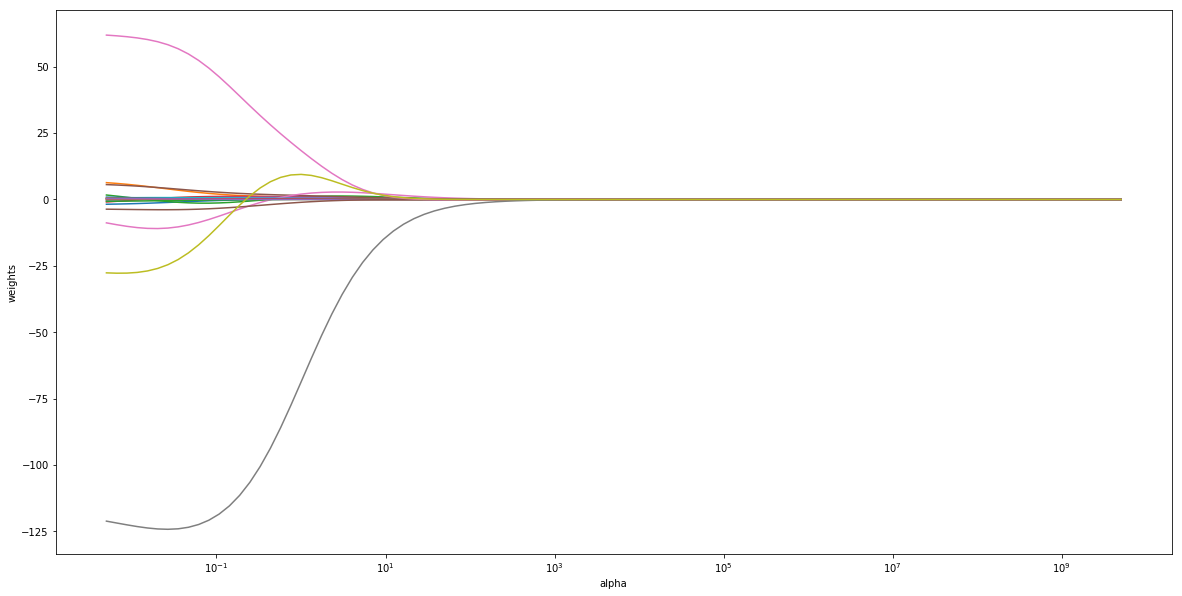

In [99]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [100]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

AtBat           0.098658
Hits            0.446094
HmRun           1.412107
Runs            0.660773
RBI             0.843403
Walks           1.008473
Years           2.779882
CAtBat          0.008244
CHits           0.034149
CHmRun          0.268634
CRuns           0.070407
CRBI            0.070060
CWalks          0.082795
PutOuts         0.104747
Assists        -0.003739
Errors          0.268363
League_N        4.241051
Division_W    -30.768885
NewLeague_N     4.123474
dtype: float64
106216.52238


In [101]:
ridge3 = Ridge(alpha = 10**2, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

AtBat          0.012221
Hits           0.043525
HmRun          0.191810
Runs           0.071994
RBI            0.087599
Walks          0.091751
Years          0.364400
CAtBat         0.000981
CHits          0.003707
CHmRun         0.027534
CRuns          0.007653
CRBI           0.007251
CWalks         0.009176
PutOuts        0.006988
Assists       -0.000222
Errors         0.020754
League_N      -0.190495
Division_W    -1.536928
NewLeague_N   -0.147543
dtype: float64
162386.469374


In [102]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

AtBat           -1.821115
Hits             4.259156
HmRun           -4.773401
Runs            -0.038760
RBI              3.984578
Walks            3.470126
Years            9.498236
CAtBat          -0.605129
CHits            2.174979
CHmRun           2.979306
CRuns            0.266356
CRBI            -0.598456
CWalks           0.171383
PutOuts          0.421063
Assists          0.464379
Errors          -6.024576
League_N       133.743163
Division_W    -113.743875
NewLeague_N    -81.927763
dtype: float64
116690.468567


In [103]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.57487849769886779

In [104]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

99825.648962927298

In [105]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

AtBat           0.055838
Hits            0.934879
HmRun           0.369048
Runs            1.092480
RBI             0.878259
Walks           1.717770
Years           0.783515
CAtBat          0.011318
CHits           0.061101
CHmRun          0.428333
CRuns           0.121418
CRBI            0.129351
CWalks          0.041990
PutOuts         0.179957
Assists         0.035737
Errors         -1.597699
League_N       24.774519
Division_W    -85.948661
NewLeague_N     8.336918
dtype: float64

<font color='red'>L1 Regularization</font>


C:\Users\sayee\Anaconda4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sayee\Anaconda4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sayee\Anaconda4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sayee\Anaconda4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

Text(0,0.5,'weights')

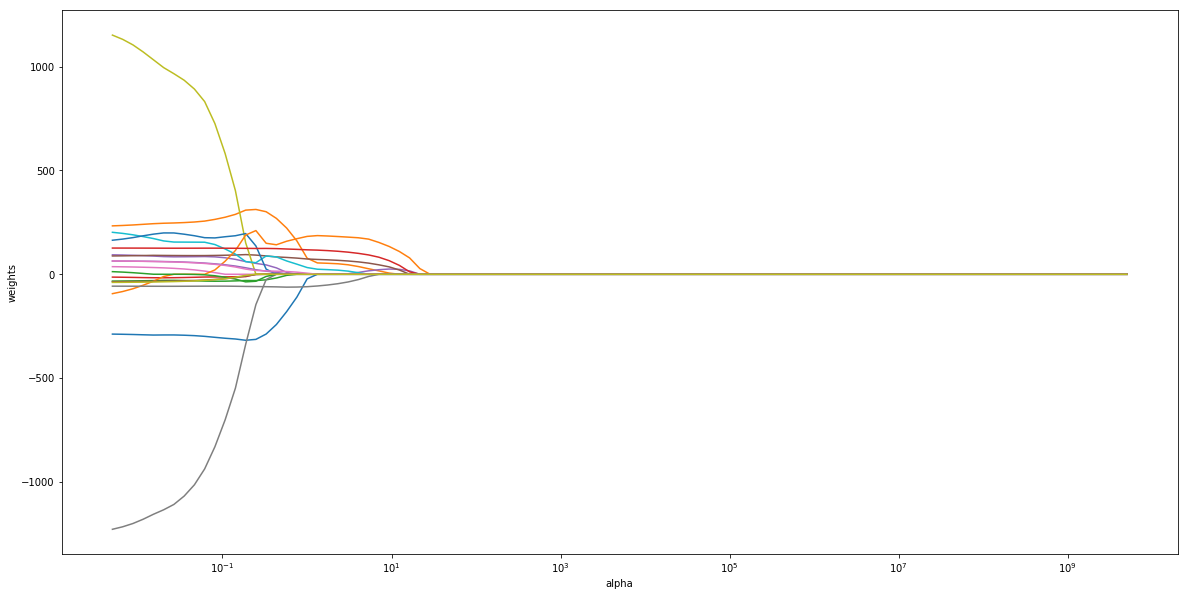

In [107]:
lasso = Lasso( normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [114]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(lassocv.alpha_)
mean_squared_error(y_test, lasso.predict(X_test))

2.40297301574


104960.65853895503

In [112]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat           0.000000
Hits            1.082446
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.906388
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.219367
CRuns           0.000000
CRBI            0.513975
CWalks          0.000000
PutOuts         0.368401
Assists        -0.000000
Errors         -0.000000
League_N        0.000000
Division_W    -89.064338
NewLeague_N     0.000000
dtype: float64

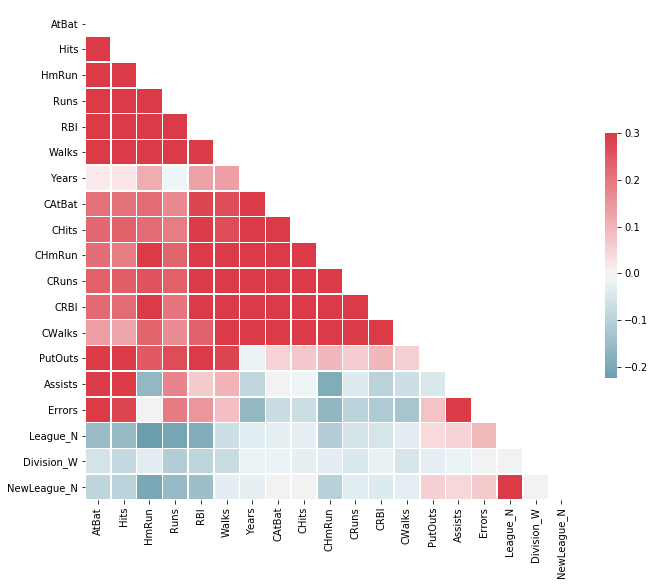

In [110]:
corr = X.corr()
# Set up the matplotlib figure
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})